In [76]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from konlpy.tag import Twitter
twt = Twitter()
from hanspell import spell_checker
import re
from konlpy.tag import Okt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Kkma
from sklearn.linear_model import Lasso
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import tensorflow as tf
import os
from tqdm.notebook import tqdm

# import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

C:\Users\jby\AppData\Local\Continuum\anaconda3\envs\textmining\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [2]:
df = pd.read_csv('./result/2021-03-10_20-10-56 마켓컬리.csv')
df.head()

,name,ratings,date,helpful,comment,developer_comment
0,H J,5,2021-03-10,0,긋긋긋 아주좋아여,NaN
1,Gwang-Won Woo,5,2021-03-10,0,좋네요,NaN
2,Olivia Kim,4,2021-03-10,0,정확한 시간에 배달되어 만족합니다.,NaN
3,hey jin kang,5,2021-03-10,0,좋아요,NaN
4,이쑤신장군,5,2021-03-10,0,좋아영,NaN


In [3]:
df.describe()

,ratings,helpful
count,6890.000000,6890.000000
mean,4.353266,1.380697
std,1.248727,8.535908
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,283.000000


In [4]:
df = df[['date', 'comment', 'ratings']]

In [5]:
df = df.dropna(axis = 0, how = 'any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6890 entries, 0 to 6889
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     6890 non-null   object
 1   comment  6890 non-null   object
 2   ratings  6890 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 215.3+ KB


In [6]:
df['comment']

0                                               긋긋긋 아주좋아여
1                                                     좋네요
2                                     정확한 시간에 배달되어 만족합니다.
3                                                     좋아요
4                                                     좋아영
                              ...                        
6885    아이를 키우며 좋은 식자재에 대한 갈증이 있는데 이렇게  건강하고 신선한 먹거리를 ...
6886    아는동생소개로알게된마켓컬리 늦게안게아쉬울정도ㅋㅋ제품퀄리티완젼좋고,포장배송완벽함!내눈...
6887                   샛별배송 정말 훌륭합니다. 컬리라면 무조건 믿고 주문~ ^^*
6888                              더이상 밤늦게 슈퍼를 헤매고 다니지않아도됨
6889                                                 Good
Name: comment, Length: 6890, dtype: object

In [7]:
from soyspacing.countbase import CountSpace
def 띄어쓰기(text):
    verbose=False
    mc = 10  # min_count
    ft = 0.3 # force_abs_threshold
    nt =-0.3 # nonspace_threshold
    st = 0.3 # space_threshold


    sent_corrected, tags = model.correct(
    doc=text,
    verbose=verbose,
    force_abs_threshold=ft,
    nonspace_threshold=nt,
    space_threshold=st,
    min_count=mc)
    sent_corrected, tags = model.correct(text)
    result = sent_corrected
    return result
corpus_fname = './result/134963_norm.txt'
model = CountSpace()
model.train(corpus_fname)    

df['comment'] = df['comment'].apply(lambda x: 띄어쓰기(x))
df.head()
    
    

all tags length = 694236 --> 57795, (num_doc = 15602)

,date,comment,ratings
0,2021-03-10,긋긋긋 아주 좋아여,5
1,2021-03-10,좋네요,5
2,2021-03-10,정확한 시간에 배달되어 만족합니다.,4
3,2021-03-10,좋아요,5
4,2021-03-10,좋아영,5


In [10]:
#맞춤법 검사기
for i in tqdm(range(len(df))): 
    try: 
        result = spell_checker.check(df['comment'][i])
        a= result[1]
        df['comment'][i] = a
    except: 
        pass



C:\Users\jby\AppData\Local\Continuum\anaconda3\envs\textmining\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
def text_cleaning(text):
    hangul = re.compile('[|ㄱ-ㅎ|ㅏ-ㅣ]+') 
    result = hangul.sub('', text)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub('', text)
    return result
df['ko_text'] = df['comment'].apply(lambda x: text_cleaning(x))
df.head()

,date,comment,ratings,ko_text
0,2021-03-10,긋긋긋 아주 좋아여,5,긋긋긋 아주 좋아여
1,2021-03-10,좋네요,5,좋네요
2,2021-03-10,정확한 시간에 배달되어 만족합니다.,4,정확한 시간에 배달되어 만족합니다
3,2021-03-10,좋아요,5,좋아요
4,2021-03-10,좋아영,5,좋아영


In [12]:
# def text_cleaning2(text):
#     hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
#     result = hangul.sub('', text)
#     return result

In [13]:
# df['ko_text'] = df['ko_text'].apply(lambda x: text_cleaning2(x))
# df.head()

In [14]:
df.describe()

,ratings
count,6890.000000
mean,4.353266
std,1.248727
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [15]:
from soynlp.word import WordExtractor
from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus
from soynlp.tokenizer import LTokenizer
word_extractor = WordExtractor(min_frequency=100,
   min_cohesion_forward=0.05,
   min_right_branching_entropy=0.0
)
word_extractor.train(df['ko_text'].values)
words = word_extractor.extract()
words

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)


training was done. used memory 0.745 Gbry 0.742 Gb
all cohesion probabilities was computed. # words = 170
all branching entropies was computed # words = 8276
all accessor variety was computed # words = 8276


In [16]:
df['nouns'] = df['ko_text'].apply(lambda x: tokenizer.tokenize(x, remove_r=True)) # L과 R 분리하여 R은 삭제
df

,date,comment,ratings,ko_text,nouns
0,2021-03-10,긋긋긋 아주 좋아여,5,긋긋긋 아주 좋아여,"[긋긋긋, 아주, 좋아]"
1,2021-03-10,좋네요,5,좋네요,[좋네요]
2,2021-03-10,정확한 시간에 배달되어 만족합니다.,4,정확한 시간에 배달되어 만족합니다,"[정확한, 시간에, 배달, 만족합니다]"
3,2021-03-10,좋아요,5,좋아요,[좋아요]
4,2021-03-10,좋아영,5,좋아영,[좋아]
...,...,...,...,...,...
6885,2016-03-02,아이를 키우며 좋은 식자재에 대한 갈증이 있는데 이렇게 건강하고 신선한 먹거리를 쉽...,5,아이를 키우며 좋은 식자재에 대한 갈증이 있는데 이렇게 건강하고 신선한 먹거리를 쉽...,"[아이를, 키우며, 좋은, 식자재에, 대한, 갈증이, 있는, 이렇게, 건강하고, 신..."
6886,2016-03-02,"아는동생소개로알게된마켓컬리 늦게안게아쉬울정도ㅋㅋ제품퀄리티완젼좋고,포장배송완벽함!내눈...",5,아는동생소개로알게된마켓컬리 늦게안게아쉬울정도ㅋㅋ제품퀄리티완젼좋고포장배송완벽함내눈으로...,"[아는동생소개로알게된마켓컬리, 늦게안게아쉬울정도ㅋㅋ제품퀄리티완젼좋고포장배송완벽함내눈..."
6887,2016-03-02,샛별배송 정말 훌륭합니다. 컬리라면 무조건 믿고 주문~ ^^*,5,샛별배송 정말 훌륭합니다 컬리라면 무조건 믿고 주문,"[샛별, 정말, 훌륭합니다, 컬리, 무조건, 믿고, 주문]"
6888,2016-03-01,더이상 밤늦게 슈퍼를 헤매고 다니지않아도됨,5,더이상 밤늦게 슈퍼를 헤매고 다니지않아도됨,"[더이상, 밤늦게, 슈퍼를, 헤매고, 다니지않아도됨]"


In [17]:
df.describe()

,ratings
count,6890.000000
mean,4.353266
std,1.248727
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [18]:
df = df.reset_index()
del df['index']

In [85]:
# 한국어 약식 불용어사전 파일 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "./korean_stopwords2.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
#     nouns_tagger = tokenizer
#     nouns = nouns_tagger.tokenize(x, remove_r=True)
    nouns_tagger2 = Kkma()
    nouns = nouns_tagger2.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [86]:
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
for i in range(len(df)):
    if not df['nouns'][i]:
        df.drop([i],inplace=True)
        
df.reset_index(inplace=True)
del df['index']
print(df.shape)
df.head()

(3479, 6)


,date,comment,ratings,ko_text,nouns,y
0,2021-03-10,정확한 시간에 배달되어 만족합니다.,4,정확한 시간에 배달되어 만족합니다,[정확],1
1,2021-03-10,간편해서 좋아요,5,간편해서 좋아요,[간편],1
2,2021-03-10,신선한 제품을 빠른 배송과 가격도 만족할수 있어 좋아요.,5,신선한 제품을 빠른 배송과 가격도 만족할수 있어 좋아요,"[배송, 가격]",1
3,2021-03-10,상품의 질이 다른 오픈마켓 보다 좋네요~퀄리티가 달라요 특히 음식 시켜보니 믿음이 가네요,5,상품의 질이 다른 오픈마켓 보다 좋네요퀄리티가 달라요 특히 음식 시켜보니 믿음이 가네요,"[오픈, 오픈마켓, 퀄리티, 믿음]",1
4,2021-03-10,추. ㅊ ..ㅓ.ㅇ .ㅣ : ( 222444 )친환경 재료에 신선한 완전 최고에요....,5,추 ㅊ ㅓㅇ ㅣ 친환경 재료에 신선한 완전 최고에요상품마다 별점 주는 게 있으...,"[재료, 별점, 판단, 스토어]",1


In [21]:
all_words = []
satisfaction= []
for i in range(len(df)):
    words = df['nouns'][i]
    words_arr = []
    for n in words:
        words_arr.append(n)
        satisfaction.append(df['ratings'].iloc[i])
    all_words.extend(words_arr)
    
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()        
    

,words,satisfaction,count
0,정확한,4,1
1,시간에,4,1
2,뒤로가기,2,1
3,누르면,2,1
4,리스트가,2,1


In [22]:
words_satisfaction = all_words_df.groupby('words').mean()['satisfaction']
words_count = all_words_df.groupby('words').sum()['count']
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.head()

,satisfaction,count
words,,
ㄱㅏ입요,3.0,1
ㄱㅣ회를,5.0,1
ㄱ너무너무맛잇당,4.0,1
ㄷㅈ니ㄴ,1.0,1
ㅅ발련아,1.0,1


In [23]:
words_df = words_df.loc[words_df['count']>=3]
words_df.sort_values('satisfaction', ascending=False)

,satisfaction,count
words,,
ㅊㅜㅊㅓㄴㅇㅣㄴ,5.0,3
선보여,5.0,4
서비스도,5.0,4
생활이,5.0,4
새롭고,5.0,3
...,...,...
사라지고,1.0,4
남겨도,1.0,3
삭제했습니다,1.0,4


In [24]:
words_df.sort_values('count')

,satisfaction,count
words,,
ㅊㅜㅊㅓㄴㅇㅣㄴ,5.000000,3
실망입니다,1.333333,3
실패가,5.000000,3
실패한,5.000000,3
싫어서,2.333333,3
...,...,...
편하고,4.882883,222
있는,4.103004,233
포장,4.634241,257


In [25]:
korean_stopwords_path = "./korean_stopwords2.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
nouns_tagger =Kkma()
def text_cleaning(text):
    hangul = re.compile('[|ㄱ-ㅎ|ㅏ-ㅣ]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    nouns_tagger = tokenizer
    nouns = nouns_tagger.tokenize(result, remove_r=True)
    nouns = [x for x in nouns if len(x) >1]
    nouns =[x for x in nouns if x not in stopwords]
    return nouns

vect = CountVectorizer(tokenizer= lambda x : text_cleaning(x))
bow_vect = vect.fit_transform(df['comment'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [26]:
bow_vect.shape

(5032, 14773)

In [27]:
word_count_dict = dict(zip(word_list, count_list))
print(str(word_count_dict)[:100])

{'ㄱㅏ입요': 1, 'ㄱㅣ회를': 1, 'ㄱ너무너무맛잇당': 1, 'ㄷㅈ니ㄴ': 1, 'ㅅ발련아': 1, 'ㅇㅈㅇㅈ홧팅': 1, 'ㅈㅜㅊㅓㄴㅣ': 1, 'ㅈ되네': 1, 'ㅊㅜㅊ


In [28]:
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [29]:
print(tf_idf_vect[0])

  (0, 11464)	0.6752804592425002
  (0, 7060)	0.7375610492462559


In [30]:
invert_index_vectorizer = {v:k for k,v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100])

{11464: '정확한', 7060: '시간에', 3251: '뒤로가기', 2314: '누르면', 3633: '리스트가', 9409: '올라가', 13558: '편하', 14226


In [31]:
df.sample(10).head()

,date,comment,ratings,ko_text,nouns
2559,2020-06-07,힘내세요.. 마켓컬리 일해주시는 분들께 이 상황을 잘 극복하시는 모습에 작게나마 응...,5,힘내세요 마켓컬리 일해주시는 분들께 이 상황을 잘 극복하시는 모습에 작게나마 응원의...,"[힘내세요, 일해주시는, 분들께, 상황을, 극복하시는, 모습에, 작게나마, 응원의,..."
3223,2020-03-31,건강하고 맛있음,5,건강하고 맛있음,[건강하고]
279,2021-02-05,사용을 하여보니 정말 마음에 들어서 글을 남겨요 포장과 배송 정말 좋아요 내 물건 ...,5,사용을 하여보니 정말 마음에 들어서 글을 남겨요 포장과 배송 정말 좋아요 내 물건 ...,"[하여보니, 글을, 남겨요, 포장, 배송, 처럼, 깨끗이, 정성스럽게, 포장, 배송..."
651,2021-01-06,찜하기 기능 추가됐으면 좋겠어요,4,찜하기 기능 추가됐으면 좋겠어요,"[찜하기, 추가됐으면]"
648,2021-01-06,신속한 배달과 신선한 물품 만족합니다~~흥하세요~~,5,신속한 배달과 신선한 물품 만족합니다흥하세요,"[신속한, 신선, 물품]"


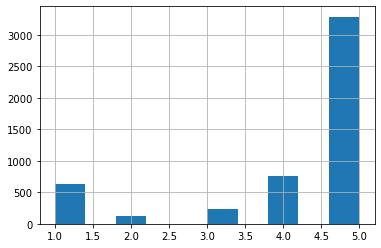

In [32]:
df.ratings.hist()

In [33]:
def rating_to_label(rating) :
  if rating >3:
    return 1
  else:
    return 0
df['y'] = df['ratings'].apply(lambda x : rating_to_label(x))

In [34]:
df

,date,comment,ratings,ko_text,nouns,y
0,2021-03-10,정확한 시간에 배달되어 만족합니다.,4,정확한 시간에 배달되어 만족합니다,"[정확한, 시간에]",1
1,2021-03-10,후기보기 너무 불편해요. 3월 1일 후기보고 뒤로가기 누르면 3월 10일로 리스트가...,2,후기보기 너무 불편해요 월 일 후기보고 뒤로가기 누르면 월 일로 리스트가 확 올라가...,"[뒤로가기, 누르면, 리스트가, 올라가, 편하, 해주]",0
2,2021-03-10,간편해서 좋아요,5,간편해서 좋아요,[간편],1
3,2021-03-10,신선한 제품을 빠른 배송과 가격도 만족할수 있어 좋아요.,5,신선한 제품을 빠른 배송과 가격도 만족할수 있어 좋아요,"[신선, 빠른, 배송, 가격]",1
4,2021-03-10,간혹 잘 쓰고 있습니다! 회사는 빨리 망했으면 해요 ㅋㅋ,1,간혹 잘 쓰고 있습니다 회사는 빨리 망했으면 해요 ㅋㅋ,"[간혹, 회사는, 빨리, 망했으면, ㅋㅋ]",0
...,...,...,...,...,...,...
5027,2016-03-02,모바일로 쉽게 살수있어서 좋아요^^,5,모바일로 쉽게 살수있어서 좋아요,"[모바일로, 쉽게, 살수있어서]",1
5028,2016-03-02,아이를 키우며 좋은 식자재에 대한 갈증이 있는데 이렇게 건강하고 신선한 먹거리를 쉽...,5,아이를 키우며 좋은 식자재에 대한 갈증이 있는데 이렇게 건강하고 신선한 먹거리를 쉽...,"[아이를, 키우며, 식자재에, 갈증이, 있는, 이렇게, 건강하고, 신선, 먹거리를,...",1
5029,2016-03-02,"아는동생소개로알게된마켓컬리 늦게안게아쉬울정도ㅋㅋ제품퀄리티완젼좋고,포장배송완벽함!내눈...",5,아는동생소개로알게된마켓컬리 늦게안게아쉬울정도ㅋㅋ제품퀄리티완젼좋고포장배송완벽함내눈으로...,"[아는동생소개로알게된마켓컬리, 늦게안게아쉬울정도ㅋㅋ제품퀄리티완젼좋고포장배송완벽함내눈...",1
5030,2016-03-02,샛별배송 정말 훌륭합니다. 컬리라면 무조건 믿고 주문~ ^^*,5,샛별배송 정말 훌륭합니다 컬리라면 무조건 믿고 주문,"[훌륭합니다, 무조건, 믿고]",1


In [70]:
df.y.value_counts()

1    4048
0     984
Name: y, dtype: int64

In [71]:
y= df['y']
X_train,X_test, y_train, y_test = train_test_split(tf_idf_vect, y, test_size = 0.2)

In [72]:
print(X_test.shape)

(1007, 14773)


# 여기까지 

# 로지스틱 회귀

In [77]:
# 5 /1 지우고 진행
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 81.03%


In [78]:
scores = cross_val_score(lr, tf_idf_vect, y, cv=5) # model, train, target, cross validation

print('cross-val-score \n{}'.format(scores))

print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

cross-val-score 
[0.8123138  0.81330685 0.8111332  0.8111332  0.81312127]
cross-val-score.mean 
0.812


In [83]:
tf_idf_vect

<5032x14773 sparse matrix of type '<class 'numpy.float64'>'
	with 29177 stored elements in Compressed Sparse Row format>

In [82]:
kfold = KFold(n_splits=5)
for n in range(3,10):

    kfold = KFold(n_splits=n)

    scores = cross_val_score(lr, tf_idf_vect, y, cv=5)

    print('n_splits={}, cross validation score: {}'.format(n, scores))

n_splits=3, cross validation score: [0.8123138  0.81330685 0.8111332  0.8111332  0.81312127]
n_splits=4, cross validation score: [0.8123138  0.81330685 0.8111332  0.8111332  0.81312127]
n_splits=5, cross validation score: [0.8123138  0.81330685 0.8111332  0.8111332  0.81312127]
n_splits=6, cross validation score: [0.8123138  0.81330685 0.8111332  0.8111332  0.81312127]
n_splits=7, cross validation score: [0.8123138  0.81330685 0.8111332  0.8111332  0.81312127]
n_splits=8, cross validation score: [0.8123138  0.81330685 0.8111332  0.8111332  0.81312127]
n_splits=9, cross validation score: [0.8123138  0.81330685 0.8111332  0.8111332  0.81312127]


In [39]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.92      0.06      0.11       203
           1       0.81      1.00      0.89       804

    accuracy                           0.81      1007
   macro avg       0.87      0.53      0.50      1007
weighted avg       0.83      0.81      0.74      1007



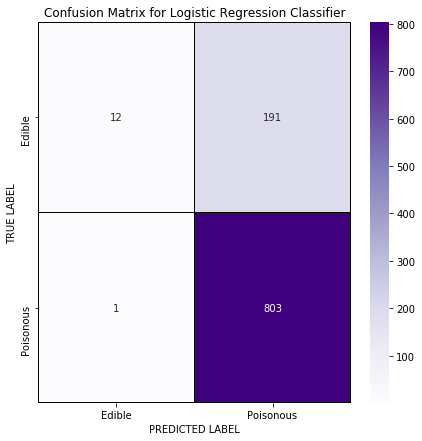

In [40]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

<BarContainer object of 14773 artists>

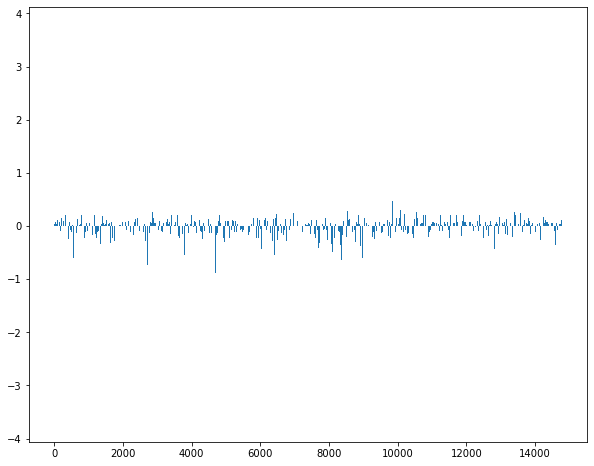

In [41]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [42]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(lr.coef_[0])), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse= False)

In [43]:
for coef in coef_pos_index[:100]:
  print(invert_index_vectorizer[coef[1]],coef[0])  

신선 3.748841749953773
편하고 3.091276690212915
편리하고 2.722806965103661
포장 2.69537130130503
빠르고 2.364807873049734
편해요 2.2492481199736782
간편 1.9981669594559206
편하 1.8785050005923862
빠른배송 1.8613157373214995
다양한 1.696592160060611
품질 1.5892988125831806
빠른 1.5320589399970386
믿고 1.4118940190791824
편합니다 1.3696435387037893
할인 1.302481315989311
편해 1.2839812774377215
많고 1.2726468580960193
많아 1.1567482628080312
빨라서 1.1459411863496196
배송 1.1405067610560387
질이 1.1210441761228656
편함 1.109680118146337
쉽고 0.9958285693296911
잘이용하고 0.9610365811376878
퀄리티가 0.9069742610331142
급할때 0.8930256880710284
많은 0.8887410370394506
받을수 0.8878766126690638
되네요 0.8202244152838359
저렴하게 0.8197129491361766
싱싱하고 0.754541538547831
되어 0.7530792896188295
믿을수 0.7505468679816326
쉽게 0.7355668102559905
추천합니다 0.7168970612111126
비싸지만 0.7158089250785723
빠르 0.7060277322851878
정확하고 0.698070196218946
좋겠 0.695926847781907
저렴하고 0.6956756278717602
즐겨찾기 0.686603626681978
덕분에 0.6843337634915378
쓰기 0.6823639372871331
편한 0.6735032685041937
쓰고있어요 0.6

In [44]:
for coef in coef_neg_index[:100]:
  print(invert_index_vectorizer[coef[1]],coef[0])

안되 -3.687251052668196
안됩니다 -1.9929466739621675
않고 -1.3384468651313786
느리고 -1.2184956084950742
장바구니 -1.183761670358675
않아요 -1.1411067704846498
비싸요 -1.0621895952455442
에러가 -1.0435904989692646
비쌈 -1.041201096171231
느려서 -1.009398867038969
오류로 -0.9321617726690465
만원이상 -0.930898174939836
원이라고 -0.9198241532536734
연결이 -0.9078764484752232
하라고 -0.8905706310106304
열리지를 -0.883863525478576
물품이 -0.8800538786011824
안와서 -0.8752991666642962
문제인지 -0.8498573147456993
같네요 -0.8272630136270757
하는 -0.8268604594648739
저만 -0.8187016719375441
못하겠네요 -0.7946356464841652
싼게 -0.792290480360494
않네요 -0.7846607195210007
뜹니다 -0.7795264669912484
택배 -0.774985329659701
탈퇴하고 -0.7641366089079346
터져서 -0.7616886876773867
지웁니다 -0.7513655924288484
아닌가 -0.7504254325093346
답답 -0.7246095997131186
갑자기 -0.7155039792938178
대체 -0.7070059386001311
되지 -0.6915832216285772
아무리 -0.6897731197717982
재설치 -0.6773127983835964
접속이 -0.6684966765190812
만든 -0.6629798061618383
지우고 -0.6597589068450143
답변도 -0.659067175181624
듭니당 -0.6587106571289196
느려

# 의사결정

In [45]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.57      0.31      0.40       203
           1       0.84      0.94      0.89       804

    accuracy                           0.81      1007
   macro avg       0.71      0.63      0.65      1007
weighted avg       0.79      0.81      0.79      1007

Test Accuracy: 81.33%


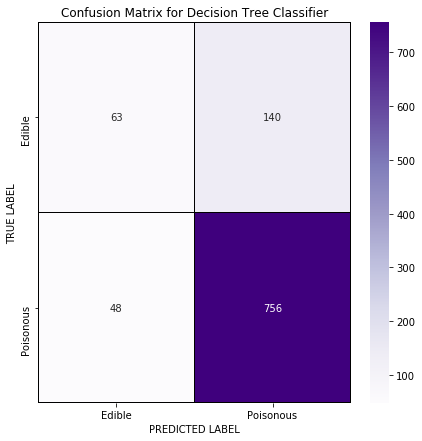

In [47]:
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

<BarContainer object of 14773 artists>

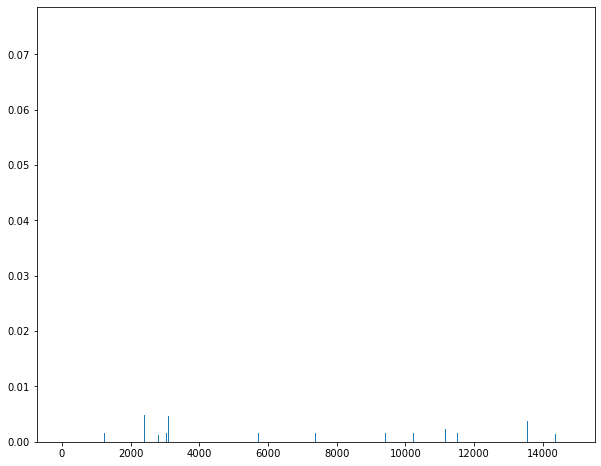

In [48]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(dt.feature_importances_)), dt.feature_importances_)

In [49]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(dt.feature_importances_)), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(dt.feature_importances_)), reverse= False)

In [50]:
for coef in coef_pos_index[:100]:
  print(invert_index_vectorizer[coef[1]], coef[0])

안되 0.07480539427844497
신선 0.020435878689254505
안됩니다 0.011344572300950529
않고 0.010861310381681758
배송 0.01061948671106142
편하고 0.009270127655474757
장바구니 0.008719433847353646
편해요 0.007739205029867837
편리하고 0.0075531526995364015
만원이상 0.00701991166521778
비쌈 0.006135756287158953
느려요 0.006111215037852694
포장 0.006091310038004142
할인 0.006048944871523084
누가 0.0058359480880529535
않아요 0.005598325581315642
누르면 0.005529543422639279
박스에 0.005144977874022953
원이라고 0.004954347531633317
대체 0.004936292329258738
못하고 0.00491833564563088
답변도 0.00490047676529103
느리고 0.004882714979262199
되는 0.004627769979354676
택배 0.004446429103286918
오류로 0.004174993049621956
이미 0.004162171573845488
에러가 0.004149409069977905
연결이 0.004124059536333469
뜹니다 0.004111471792613408
앱은 0.00406411992274363
편하 0.0037126227804124075
간편 0.0036568777115834426
비싸요 0.0036517901773193903
못함 0.0035288524772471713
빠르고 0.003512257090365475
품질 0.003336973581608833
말라는 0.0031155791314278697
한다고 0.003107500706713546
저만 0.0030994536612926403
물품이 0.00309

In [51]:
for coef in coef_neg_index[:100]:
  print(invert_index_vectorizer[coef[1]],coef[0])

ㄱㅏ입요 0.0
ㄱㅣ회를 0.0
ㄱ너무너무맛잇당 0.0
ㅅ발련아 0.0
ㅇㅈㅇㅈ홧팅 0.0
ㅈㅜㅊㅓㄴㅣ 0.0
ㅈ되네 0.0
ㅊㅜㅊㅓㄴㅇㅣㄴ 0.0
ㅊㅜ우쳐햐시면 0.0
ㅊㅜ쳐햐시면 0.0
ㅋㄷㅌㅇㅈㅁㅂㅁ레알 0.0
ㅋㄹ 0.0
ㅋㅋ 0.0
ㅋㅋㅋ 0.0
ㅋㅋㅋㅋ 0.0
ㅋㅋㅋㅋㅋㄱ 0.0
ㅋㅋㅋㅋㅋㅋ 0.0
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 0.0
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ새로가입해서 0.0
ㅋㅋㅋㅋㅋㅋㅋㅋ자취생에게 0.0
ㅋㅋㅋㅋㅋ웃긴 0.0
ㅋㅋㅋㅋ아니 0.0
ㅋㅋㅋ그딴개소리는 0.0
ㅋㅋ전화 0.0
ㅋㅜ팡 0.0
ㅋ그지같은 0.0
ㅋ망하길기도합니다 0.0
ㅋ신기하네 0.0
ㅎㅎㅎㅎ 0.0
ㅎㅎㅎㅎㅎ 0.0
ㅎㅎㅎㅎ이럴거면 0.0
ㅎㅎ아침에 0.0
ㅎㅎ장보기즐거움 0.0
ㅏ고싶어ㅈ 0.0
ㅏ서 0.0
ㅏ지는 0.0
ㅏ켓컬 0.0
ㅏ켓컬리 0.0
ㅐ요 0.0
ㅐ월째 0.0
ㅓ들었고 0.0
ㅓ요 0.0
ㅓ지ㄴ 0.0
ㅓ지네요 0.0
ㅔ요 0.0
ㅜㅜㅜ 0.0
ㅜㅜㅜㅜ 0.0
ㅜㅜㅜㅜㅜ 0.0
ㅜㅜ대실망이예요 0.0
ㅜㅠ 0.0
ㅜㅠㅋㅋㅋㅋㅋ개수좀 0.0
ㅠㅅㅜ눌러야해서 0.0
ㅠㅜ 0.0
ㅠㅜㅠㅜㅠ 0.0
ㅠㅠㅠ 0.0
ㅠㅠㅠㅠ 0.0
ㅠㅠㅠㅠㅜㅠㅜ 0.0
ㅠㅠㅠㅠㅠ 0.0
ㅠㅠㅠㅠㅠㅠㅠ 0.0
ㅠㅠㅠ얼어요 0.0
ㅠㅠ해결좀다른분들 0.0
ㅠㅡㅠ 0.0
ㅠ구매주문서 0.0
ㅠ그리고 0.0
ㅠ누굴 0.0
ㅠ마켓컬리어플생겨서 0.0
ㅡㅡㅋ 0.0
ㅡㅡㅡㅡㅡ 0.0
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅜㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ드ㅡㅡㅡㅡㅡㅗㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ 0.0
ㅣ네요 0.0
ㅣ다 0.0
ㅣ당로또번호을 0.0
ㅣ더라고요 0.0
ㅣ용하고 0.0
ㅣ용하고있습ㄴ 0.0
ㅣ용하고있습니다 0.0
ㅣ적립오류도 0.0
가겨만 0.0
가격 0.0
가고 0.0
가고편리성타 0.0
가공식품 0.0
가공식품등 0.0
가관이네요 0.0
가구이다보니 0.0
가기가 0.0
가기도 0.0
가길 0.0
가길기대하겠습니다 0.0
가까운 0.0
가까운데 0.0
가까이 0.0
가까이오면 0.0
가끔먹어보지 0.0
가끔사용하

# KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 99.63%


In [53]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))


KNN Classifier report: 

               precision    recall  f1-score   support

           0       0.31      0.35      0.33       203
           1       0.83      0.81      0.82       804

    accuracy                           0.71      1007
   macro avg       0.57      0.58      0.57      1007
weighted avg       0.73      0.71      0.72      1007



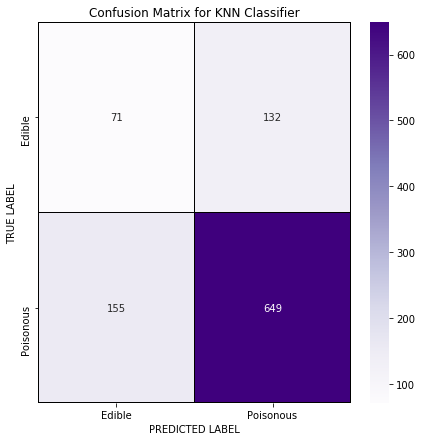

In [54]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# svm

In [55]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))


Test Accuracy: 79.84%


In [56]:
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.80      1.00      0.89       804

    accuracy                           0.80      1007
   macro avg       0.40      0.50      0.44      1007
weighted avg       0.64      0.80      0.71      1007



C:\Users\jby\AppData\Local\Continuum\anaconda3\envs\textmining\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


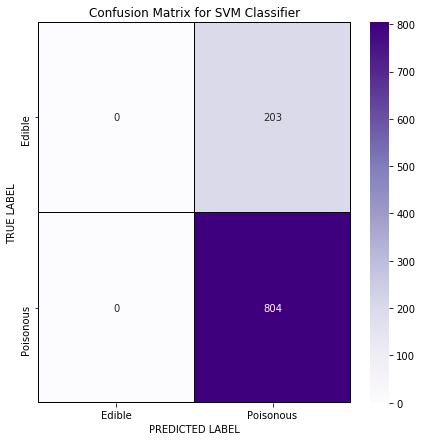

In [57]:
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# 랜덤포레스트

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 82.42%


In [59]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.82      0.16      0.27       203
           1       0.82      0.99      0.90       804

    accuracy                           0.82      1007
   macro avg       0.82      0.58      0.59      1007
weighted avg       0.82      0.82      0.77      1007



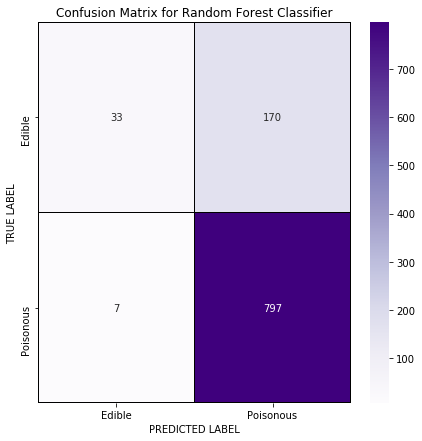

In [60]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

<BarContainer object of 14773 artists>

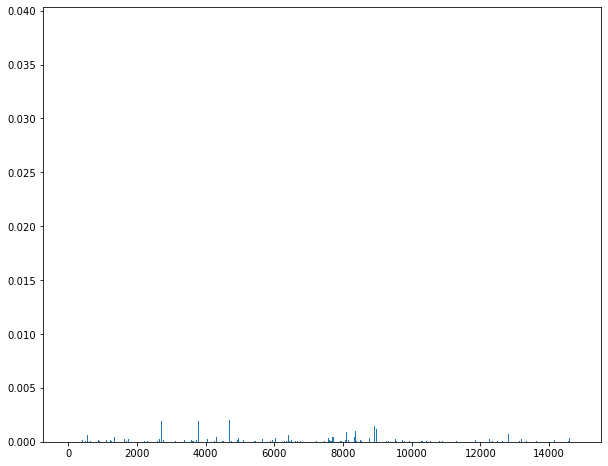

In [61]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)

In [62]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(rf.feature_importances_)), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(rf.feature_importances_)), reverse= False)

In [63]:
for coef in coef_pos_index[:100]:
  print(invert_index_vectorizer[coef[1]], coef[0])

안되 0.03843002217326322
신선 0.010139621594062526
안됩니다 0.007320190048802404
배송 0.0054107890413365115
장바구니 0.00484810504218749
않아요 0.004181112265661977
편하고 0.004108168412991638
느리고 0.0038413441116083302
비싸요 0.0034837109152094565
포장 0.0034513335441939998
비쌈 0.0033717193987218095
에러가 0.0032049059492879036
편리하고 0.003073349410476218
연결이 0.002981388830027096
않고 0.002911295776783217
저만 0.002864005608294144
느려서 0.0028367677024026317
원이라고 0.0027063898617859378
하라고 0.0026955556061776607
느려요 0.0026855474248503835
편해요 0.002495168863531747
않네요 0.0024885663428736737
갑자기 0.0023021296606129176
같네요 0.002276323899004345
열리지를 0.0021672581522343736
만원이상 0.002140896733816448
대체 0.0021148991572603037
빠르고 0.0020783713975527644
물품이 0.00200570287123949
없습니다 0.0019663838880209115
박스에 0.0019519651853730016
만들어주세요 0.0019391091987350825
아무리 0.0019219383248532008
답답 0.0018853677447023057
되지 0.001819147512147076
지웁니다 0.001801915225308024
재설치 0.0017732069727137572
누르면 0.0017268850844149187
안깔리는걸까요 0.001707097314759748
뜹

In [64]:
for coef in coef_neg_index[:100]:
  print(invert_index_vectorizer[coef[1]])

ㄱㅣ회를
ㅈㅜㅊㅓㄴㅣ
ㅊㅜ우쳐햐시면
ㅊㅜ쳐햐시면
ㅋㄷㅌㅇㅈㅁㅂㅁ레알
ㅋㄹ
ㅋㅋㅋㅋㅋㄱ
ㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋ자취생에게
ㅋㅋㅋㅋㅋ웃긴
ㅋㅋ전화
ㅋㅜ팡
ㅋ신기하네
ㅎㅎ아침에
ㅏ고싶어ㅈ
ㅏ서
ㅏ켓컬
ㅓ들었고
ㅓ요
ㅓ지ㄴ
ㅓ지네요
ㅜㅜㅜㅜ
ㅜㅠㅋㅋㅋㅋㅋ개수좀
ㅠㅅㅜ눌러야해서
ㅠㅜㅠㅜㅠ
ㅠㅠㅠㅠㅠㅠㅠ
ㅠㅠ해결좀다른분들
ㅠㅡㅠ
ㅠ그리고
ㅠ누굴
ㅡㅡㅡㅡㅡ
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅜㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ드ㅡㅡㅡㅡㅡㅗㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
ㅣ네요
ㅣ당로또번호을
ㅣ용하고
ㅣ용하고있습ㄴ
ㅣ용하고있습니다
ㅣ적립오류도
가공식품
가길
가까운데
가까이
가까이오면
가끔먹어보지
가끔사용하는데
가난해져만
가네요
가능도
가능하며
가능한거죠
가능한게
가능할듯합니다
가능합니까
가득하구요
가려놓습니까
가르키지말고
가방으로
가보니
가보셔서
가상계좌이체도
가성비가좋아요
가성비도
가성비입니다
가시는지
가야되는데
가이드를
가자미와
가장큰
가져가려고
가져가지도
가져간더니
가져간줄
가져다주셔서
가져야
가졌었는데
가족들
가지런히
가치관이
가하는
각제품마다
간결하고
간결함
간소화에서
간식들과
간식류도
간식이나
간적이
갈시간이
갈아탈
갈아탈걸
갈아탈데
갈아탔다가
갈아탔어요
갈증이
갈치
감당할
감동ㅠㅠ
감동받아
감동생산자와
감동이에요


# 라쏘

In [65]:
alpha = 0.00001
lasso = Lasso(alpha=alpha,random_state=42)
lasso.fit(X_train, y_train)
print("X_train,y_train Accuracy: {}%".format(round(lasso.score(X_train, y_train)*100, 2)))
print("X_test,y_test Accuracy: {}%".format(round(lasso.score(X_test, y_test)*100, 2)))
pred = lasso.predict(X_test)
print(f"lasso alpha{alpha} y_test,pred Mse",mean_absolute_error(y_test, pred))
print(f"lasso alpha{alpha} y_test,pred SQRT Mse",np.sqrt(mean_squared_error(y_test, pred)))

X_train,y_train Accuracy: 95.96%
X_test,y_test Accuracy: -4.67%
lasso alpha1e-05 y_test,pred Mse 0.21338563758213344
lasso alpha1e-05 y_test,pred SQRT Mse 0.4104534293929776
